<a href="https://colab.research.google.com/github/AlmightyX20/CCINSYSL_ASSIGNMENT_COM-DF211/blob/main/exercise_5_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 5 B

In [56]:
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

In [57]:
faces = fetch_olivetti_faces()

In [58]:
faces.data.shape

(400, 4096)

In [59]:
faces.images.shape

(400, 64, 64)

In [60]:
faces.target.shape

(400,)

In [61]:
faces.target[200]

20

#### 1. Plot the image of index zero

<Figure size 640x480 with 0 Axes>

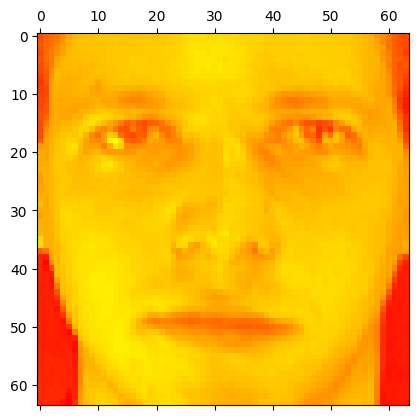

In [62]:
# put your answer here
plt.autumn()
plt.matshow(faces.images[0])
plt.show()

#### 2. Create a subplot of 10 images in a 3x3 configuration

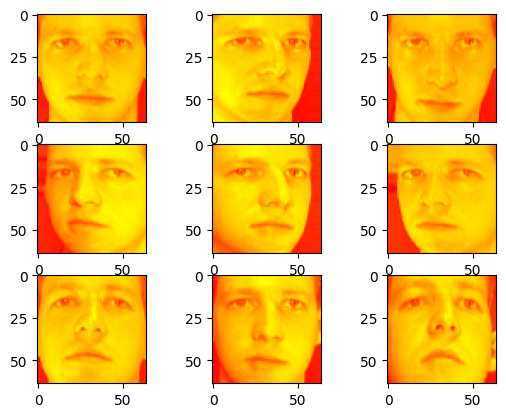

In [63]:
# put your answer here
f, axarr = plt.subplots(3,3)
axarr[0,0].imshow(faces.images[0])
axarr[0,1].imshow(faces.images[1])
axarr[0,2].imshow(faces.images[2])
axarr[1,0].imshow(faces.images[3])
axarr[1,1].imshow(faces.images[4])
axarr[1,2].imshow(faces.images[5])
axarr[2,0].imshow(faces.images[6])
axarr[2,1].imshow(faces.images[7])
axarr[2,2].imshow(faces.images[8])
plt.show()


#### 3. Split the data into a training and test set

In [64]:
# put your answer here
train_img, test_img, train_lbl, test_lbl = train_test_split(
    faces.data, faces.target, test_size=1/7.0, random_state=0)

#### 4. Create a new instance of the LogisticRegression class

In [65]:
# put your answer here
logisticRegr = LogisticRegression()


#### 5. Train the model using the training set using the `fit()` function

In [66]:
# put your answer here
logisticRegr.fit(train_img,train_lbl)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### 6. Use the test data to test the model using the `predict()` function

In [67]:
# put your answer here
logisticRegr.predict(test_img[0].reshape(1,-1))


array([13])

In [68]:
logisticRegr.predict(test_img[0:10])

array([13, 30, 34, 19, 24,  6, 15, 26, 14, 21])

In [69]:
predictions = logisticRegr.predict(test_img)

#### 7. Get the accuracy using the `score()` function

In [70]:
# put your answer here
score = logisticRegr.score(test_img, test_lbl)
print(score)

0.9655172413793104


#### 8. Collect all the misclassified images and create a plot for visualization

In [71]:
# put your answer here
index = 0
misclassifiedIndexes = []
for label, predict in zip(test_lbl, predictions):
    if label != predict:
        misclassifiedIndexes.append(index)
    index +=1


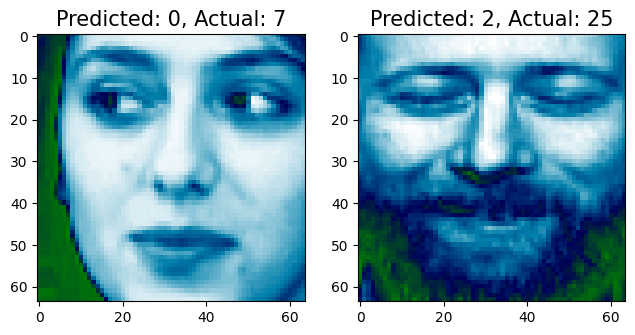

In [72]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(test_img[badIndex], (64,64,1)), cmap=plt.cm.ocean)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], test_lbl[badIndex]), fontsize = 15)

## Gradient Descent

#### 9. Use the `SGDClassifier()` to use gradient descent to minimize the loss

In [73]:
# put your answer here
clf = SGDClassifier(loss="log_loss", penalty="l2")



#### 10. Train the model using the training set using the `fit()` function

In [74]:
# put your answer here
clf.fit(train_img, train_lbl)

SGDClassifier(loss='log_loss')

#### 11. Use the test data to test the model using the `predict()` function

In [75]:
# put your answer here
y_pred = clf.predict(test_img)

#### 12. Get the accuracy using the `score()` function

In [76]:
# put your answer here
score = clf.score(test_img, test_lbl)
print(score)

0.8793103448275862


#### 13. Find the best number of iterations to get the best accuracy

0.8275862068965517
0.896551724137931
0.8448275862068966


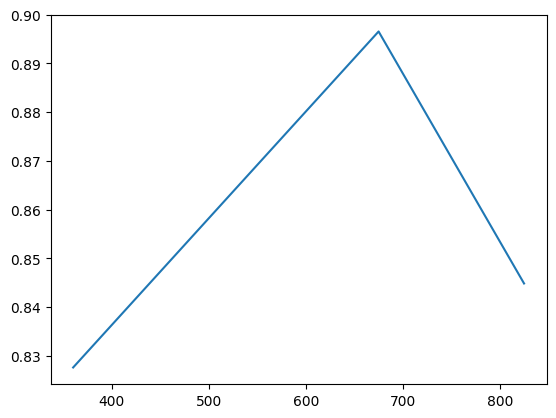

In [104]:
# put your answer here
numberIteration = [360,675,825]
scores = []

for i in numberIteration:
  clf = SGDClassifier(loss="log_loss", penalty="l2")
  clf.fit(train_img, train_lbl)
  y_pred = clf.predict(test_img)
  score = clf.score(test_img, test_lbl)
  scores.append(score)
  print(score)

plt.plot(numberIteration, scores)

